<h1><b>TELECOM CHURN ANALYSIS</b></h1>

**Kaggle DataSet** : [*Telecom Churn Analysis*](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


*   This notebook provides an in-depth analysis of customer churn in a telecom company.
*  The objective is to identify key factors contributing to churn and provide actionable insights to reduce churn rates.
* The objective is to identify key factors contributing to churn and provide actionable insights to reduce churn rates.



<h3><b>Importing necessary libraries</b></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3><b>Setting a vibrant theme for visualizations</h3></b>

In [2]:
sns.set_theme(style="ticks", palette="pastel")

<h3><b>Importing The DataSet</b></h3>

In [6]:
df = pd.read_csv(r"C:\Users\My PC\Desktop\VihaaShetty\PROJECTS\Python And Libraries\Telecom Churn Analysis\Telecom Customer Churn DataSet.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<h3><b>Import First 10 Rows</b></h3>

In [7]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<h3><b>Overview of DataSet</b></h3>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<h3><b>Notable Points</b></h3>

*   TotalCharges : Supposed to be float, but is an Object.
*   Reason : Blank values found in CSV File.
*   Conclusion : Tenure is 0, hence Total Charges is 0. Customer has not churned out.




In [9]:
df["TotalCharges"] = df["TotalCharges"].replace(' ', 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

<h3><b>Confirm Change of dtype of "TotalCharges" from object -> float</b></h3>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<h3><b>Check for NULL Values</b></h3>

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h3><b>Statistical Analysis</b></h3>

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<h3><b>Check For Duplicates</b></h3>

In [13]:
df.duplicated().sum()
#df["customerID"].duplicated().sum()

0

<h3><b>Fixing Senior Citizen Values from 1/0 -> Yes/No<b></h3>

In [14]:
def conv(value):
  if value == 1 :
    return "Yes"
  else :
    return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<h3><b>Check The Count of Churned and Non Churned Customers</b></h3>

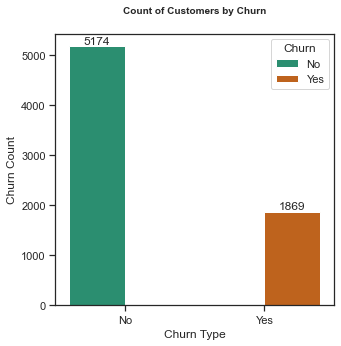

In [15]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = df['Churn'], data = df, palette='Dark2', hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Churn", fontsize = 10, fontweight='bold',  pad=20)
plt.xlabel('Churn Type')
plt.ylabel('Churn Count')
plt.show()

#Conclusion : Maximum customers have not churned.

<h3><b>View of Data in % format.</b></h3>

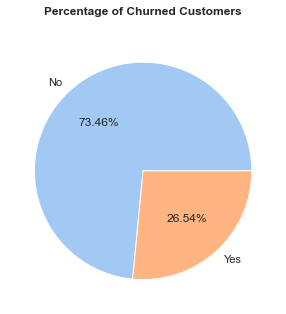

In [16]:
plt.figure(figsize = (5,5))
gb =  df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct ="%1.2f%%" )
plt.title("Percentage of Churned Customers", fontweight='bold',  pad=20)
plt.show()

#Conclusion : From below PIE Chart, we can conclude that 26.54% of the customers are churned out.


<h2><b>Analyze the Reason Using Churn Analysis.</b></h2>

<h3><b><i>Churn Analysis Based on Gender</i></b></h3>

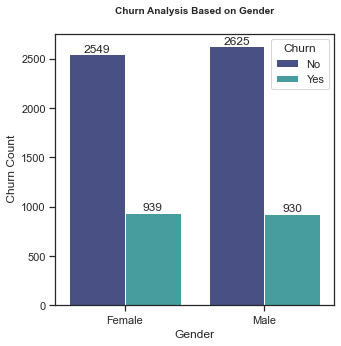

In [17]:
plt.figure(figsize = (5,5))
ay = sns.countplot(x="gender", data=df, hue = "Churn", palette='mako')

for container in ay.containers :
  ay.bar_label(container)

plt.title("Churn Analysis Based on Gender", fontsize = 10, fontweight='bold',  pad=20)
plt.xlabel('Gender')
plt.ylabel(' Churn Count')
plt.show()

#Conclusion : NO extreme difference noticed in Gender Churns.

<h3><b><i>Churn Analysis Based on Senior Citizen</i></b></h3>

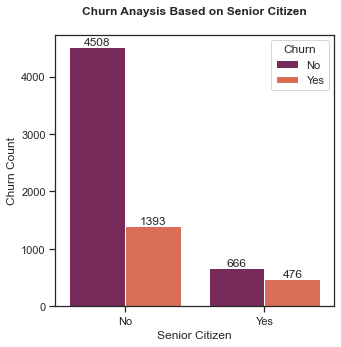

In [18]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x="SeniorCitizen", data=df, hue = "Churn", palette='rocket')
for container in ax.containers :
  ax.bar_label(container)
plt.title("Churn Anaysis Based on Senior Citizen", fontweight='bold',  pad=20)
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Count')
plt.show()

#Conclusion : Greater % of Senior Citizen have churned.

<h3><b><i>Churn Analysis Based on Tenure</i></b></h3>

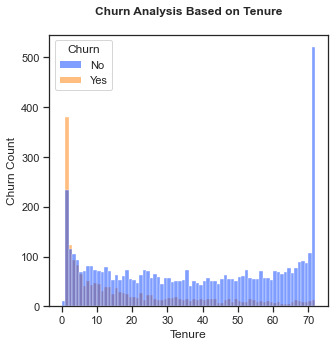

In [19]:
plt.figure(figsize = (5,5))
sns.histplot(x= "tenure", data =df, bins=72, hue = "Churn", palette ='bright')
plt.xlabel('Tenure')
plt.ylabel('Churn Count')
plt.title('Churn Analysis Based on Tenure', fontweight='bold',  pad=20)
plt.show()

#Conclusion : People who have used our services, have not churned.
              #People who did not use services for long, have churned.
              #This means people are satisfied with services.

<h3><b><i>Churn Analysis Based on Contract Type</i></b></h3>


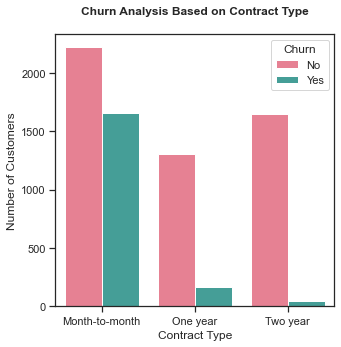

In [20]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='husl')
plt.title('Churn Analysis Based on Contract Type', fontweight='bold',  pad=20)
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

#Conclusion : Customers with 1/2 year contracts have less rate of churn rate. Customers with Month-Month have higher rate of churn.
              #It is essential to make good offers to the Month-Month customers to stay commited to our services.

<h3><b>Checking Out For Columns</h3></b>

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

<h3><b><i>Churn Analysis Based On Various Other Facilities</i></b></h3>

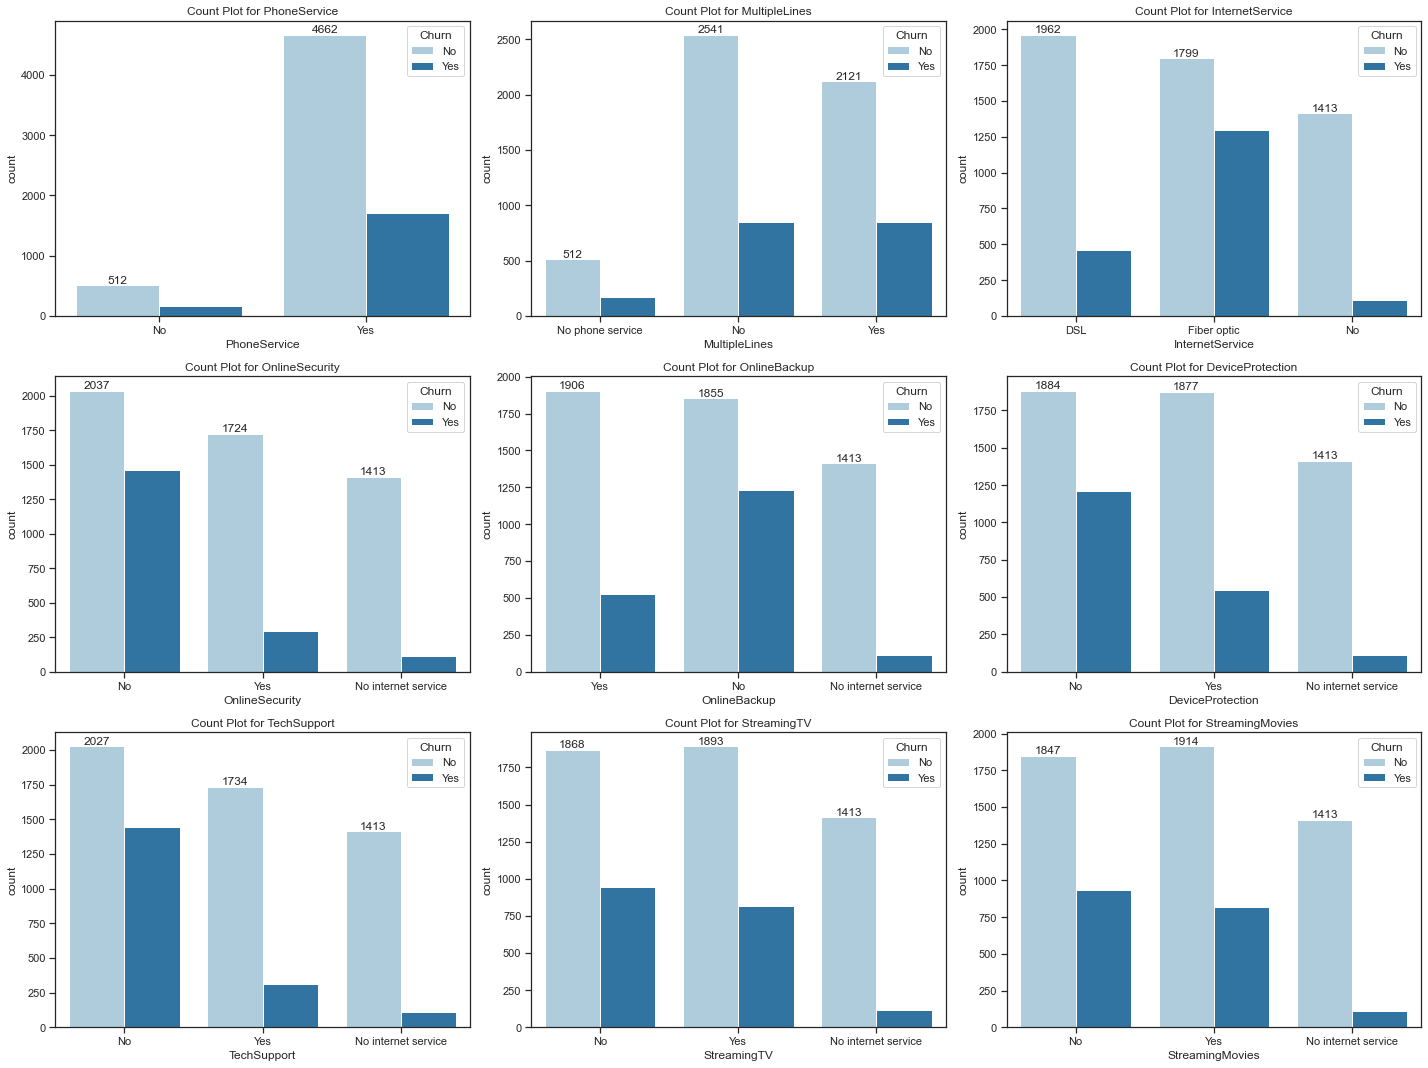

In [22]:
#Create SubPlots for rest of the services provided and analyse the data

# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots (3 rows, 3 columns for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each column and create a count plot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue = "Churn", palette = 'Paired')
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].bar_label(axes[i].containers[0], label_type="edge")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#Conclusion : 3 to 4 key insights from the provided count plots

#PhoneService and MultipleLines: A majority of customers have PhoneService, and among them, more customers who churned had MultipleLines compared to those with No phone service.

#InternetService and Online Features: Customers with Fiber optic internet service show a higher churn rate compared to those with DSL or no internet service.Services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport show that customers who don't have these services are more likely to churn.

#Streaming Services: Customers with StreamingTV and StreamingMovies have similar churn behavior, where those without streaming services are less likely to churn compared to those who have them.

#Overall Trend: In almost all cases, customers without a particular service are less likely to churn compared to those who subscribe to the service, indicating that service usage may correlate with churn behavior.



<h3><b><i>Churn Analysis Based On Payment Methods</i></b></h3>

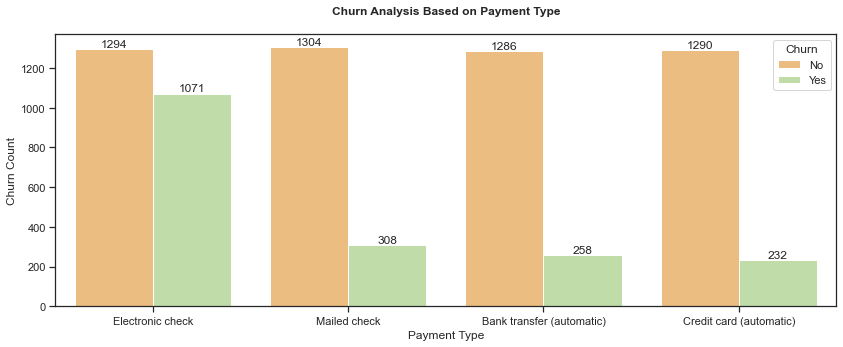

In [23]:
plt.figure(figsize = (14,5))
ax = sns.countplot(x="PaymentMethod", data = df, hue = "Churn", palette = 'Spectral')
for container in ax.containers :
  ax.bar_label(container)

plt.title("Churn Analysis Based on Payment Type", fontweight='bold',  pad=20)
plt.xlabel('Payment Type')
plt.ylabel('Churn Count')
plt.show()

#Conclusion :

#Customers using Electronic Check have the highest churn rate compared to other payment types, indicating that this payment method may be linked to dissatisfaction or higher churn risk.
#Automatic payment methods (Bank Transfer and Credit Card) have significantly lower churn rates, suggesting that customers who set up automated payments are more likely to remain loyal.
#Mailed Check also has a moderate churn rate, but it's still much lower compared to Electronic Check.